## Activation Functions:
- Activation function helps in determining a neuron should be activated or not by calculating weighted sum and further adding bias to it.thus, introducing a transformation to the input.

#### Why Activation Functions are needed in a Neural Network:-
- The purpose of the activation function is to introduce non-linearity into the output of the neurons in the network so as to learn complex patterns. 

In [285]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

class Activation():
    def __init__(self, expression):
        self.expression = expression 
    
    def plot_graph(self,**kwargs):
        if kwargs.get("sec_derivative") is not None:
            plt.plot(kwargs.get("x_axis"), kwargs.get("y_axis"), label=self.__class__.__name__)
            plt.plot(kwargs.get("x_axis"), kwargs.get("z_axis"), label='first_derivative',linestyle='dashed')
            plt.plot(kwargs.get("x_axis"), kwargs.get("sec_derivative"), label='second_derivative',linestyle='dotted')
            plt.legend(loc='upper left')
            return plt.show()
        
        elif kwargs.get("z_axis") is not None:
            plt.plot(kwargs.get("x_axis"), kwargs.get("y_axis"), label='sigmoid')
            plt.plot(kwargs.get("x_axis"), kwargs.get("z_axis"), label='sigmoid_derivative')
            plt.legend(loc='upper left')
            return plt.show()
        else:
            return plt.plot(kwargs.get("x_axis"),kwargs.get("y_axis"))
    
    def derivative(self,**kwargs):
        x = symbols('x')
        expression= self.expression
        df_expression = diff(expression, x,kwargs.get("order"))
        df=lambdify(x, df_expression)
        return df(kwargs.get("z"))

In [166]:
## input values
x_plots= np.linspace(-10,10,101)

## 1. Sigmoid Activation:

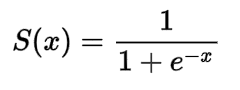

In [12]:
import handcalcs.render
from math import sqrt,exp

In [22]:
%%render
x=2
z= 1.0/(1 + exp(x))

<IPython.core.display.Latex object>

In [286]:
class sigmoid(Activation):
        def __init__(self, input_values):
            self.x = symbols('x')
            self.input_values= input_values
            self.expression = 1.0/(1 + exp(-self.x))
            self.activation_values = 1.0/(1 + np.exp(-input_values))
            super().__init__(self.expression)
        def visualize(self):
            return super().plot_graph(x_axis=self.input_values,y_axis=self.activation_values)
        def visualize_derivatives(self):
            first_order_derv=super().derivative(z=x_plots,order=1)
            second_order_derv=super().derivative(z=x_plots,order=2)
            super().plot_graph(x_axis=self.input_values,y_axis=self.activation_values,z_axis=first_order_derv,sec_derivative=second_order_derv)

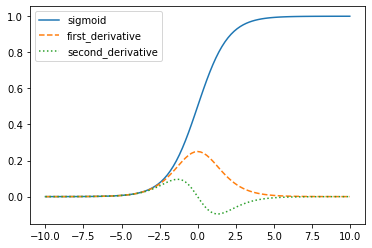

In [287]:
s=sigmoid(x_plots)
s1=s.visualize_derivatives()
s1
# Activation.plot_graph(x_axis=self.input_values,y_axis=self.activation_values)

#### Points to note:
- **The value of Sigmoid** ranges between 0 and 1
- **The Derivative of Sigmoid** ranges between 0 and 0.25.
- _**Prone to Vanishing Gradient:**_  it is clear that using sigmoid functions in the hidden layers of a deep neural network, would result to the problem of Vanishing Gradient. 

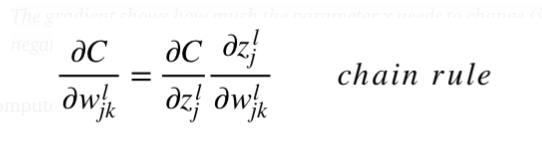

- When the input is slighty away from the co-ordinate origin, the derivative of sigmoid is a minimal value and thus the differential on this chain is very small.
- And more over, futhur back propogating throughtout all the layers of deep neural network, it may pass through many sigmoids, which will eventually cause the weight W to have effect on the loss function which is not conductive to optimization of weights,thus causing the problem of Vanishing Gradient. hence it is not recommended to use sigmoid as activation function in the hidden layers.



## 2. Hyperbolic Tangent:

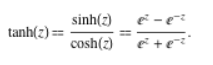

In [288]:

class tanh(Activation):
    def __init__(self, input_values):
        self.x = symbols('x')
        self.input_values= input_values
        self.expression = (exp(self.x)-exp(-self.x))/(exp(self.x)+exp(-self.x))
        self.activation_values = (np.exp(self.input_values)-np.exp(-self.input_values))/(np.exp(self.input_values)+np.exp(-self.input_values))
        super().__init__(self.expression)
    def visualize(self):
        return super().plot_graph(x_axis=self.input_values,y_axis=self.activation_values)
    def visualize_derivatives(self):
        first_order_derv=super().derivative(z=x_plots,order=1)
        second_order_derv=super().derivative(z=x_plots,order=2)
        super().plot_graph(x_axis=self.input_values,y_axis=self.activation_values,z_axis=first_order_derv,sec_derivative=second_order_derv)

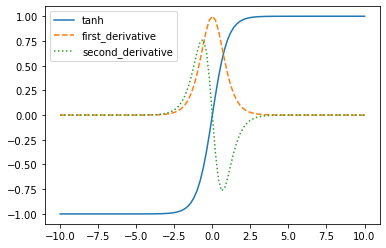

In [289]:
t=tanh(x_plots)
t1=t.visualize_derivatives()
t1

## Points to Note:-
- Value ranges from -1 to 1
- The value of derivatives ranges from 0 to 1
- The output interval of tanh is 1 and the whole function is 0-centroid, thus better than Sigmoid.
- Tanh is also prone to vanishing gradient as sigmoid

## 3.Rectified Unit :-

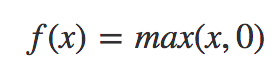

In [290]:

class relu(Activation):
    def __init__(self, input_values):
        self.x = symbols('x')
        self.input_values= input_values
        self.expression = 'max(0.0,x)'
        self.activation_values = np.maximum(0.0,input_values)
        super().__init__(self.expression)
    def visualize(self):
        return super().plot_graph(x_axis=self.input_values,y_axis=self.activation_values)
    
    def derivative(self,**kwargs):
        z=kwargs.get("z")
        return np.greater(z, 0).astype(int)
    
    def visualize_derivatives(self):
        first_order_derv=self.derivative(z=x_plots,order=1)
        second_order_derv=self.derivative(z=first_order_derv,order=2)
        super().plot_graph(x_axis=self.input_values,y_axis=self.activation_values,z_axis=first_order_derv,sec_derivative=second_order_derv)

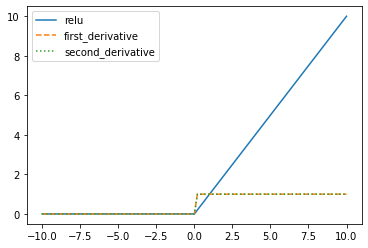

In [291]:
r=relu(x_plots)
r.visualize_derivatives()

## Points to Note:

- The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.
- The derivative of Relu is always 1 for inputs > 0, and is 0 for all inputs <=0 (because the derivative of constants is 0).
- Hence it is used always in hidden layers and it solves the problem of vanishing gradient.
- It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.
- ReLU is Non Zero centered and is non differentiable at Zero, but differentiable anywhere else.
- Relu has the problem of Dead activation function or dying Relu, this occurs when the inputs to relu are negative values and resulting a zero as output of function. thus the weight updation does not happen in chain rule.

## 4.Leacky Rectified Unit :-



- Leaky Rectified Linear Unit, or Leaky ReLU, is a type of activation function based on a ReLU, but it has a small slope for negative values instead of a flat slope. The slope coefficient is determined before training, i.e. it is not learnt during training

In [292]:

class leackyrelu(Activation):
    def __init__(self, input_values):
        self.x = symbols('x')
        self.input_values= input_values
        self.expression = 'max(0.01x,x)'
        self.activation_values = np.maximum(0.01*input_values,input_values)
        super().__init__(self.expression)
    def visualize(self):
        return super().plot_graph(x_axis=self.input_values,y_axis=self.activation_values)
    
    def derivative(self,**kwargs):
        z=kwargs.get("z")
        return np.greater(z, 0.01*z).astype(float)
    
    def visualize_derivatives(self):
        first_order_derv=self.derivative(z=x_plots,order=1)
        second_order_derv=self.derivative(z=first_order_derv,order=2)
        super().plot_graph(x_axis=self.input_values,y_axis=self.activation_values,z_axis=first_order_derv,sec_derivative=second_order_derv)

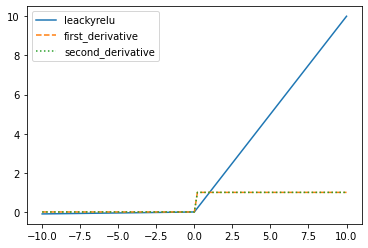

In [293]:
l=leackyrelu(x_plots)
l.visualize_derivatives()

## Points to Note:
- Leaky Relu solves the problem of dying Relu , as the derivative of negative input values of relu is not zero.